In [1]:
"""
    Práctica 3  - Laboratorio 01

    Asignatura:   Data mining

    Autores: 
            - Beatriz Magán Pinto
            - Andrés Felipe Sánchez Patarroyo
            - David Alonso Rodríguez Lepina
            - Raúl Jiménez Juárez

    Fecha:      30/09/2019
"""

'\n    Práctica 3  - Laboratorio 01\n\n    Asignatura:   Data mining\n\n    Autores: \n            - Beatriz Magán Pinto\n            - Andrés Felipe Sánchez Patarroyo\n            - David Alonso Rodríguez Lepina\n            - Raúl Jiménez Juárez\n\n    Fecha:      30/09/2019\n'

## Importamos las librerías necesarias

In [2]:
#Importamos las librerías necesarias para la práctica 3
%reset
import pandas as pd
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt 
from sklearn import decomposition

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


# Obtención de datos
Para obtener los datos, importaremos el csv y lo guardaremos en un dataframe, almacenando únicamente las columnas relevantes.

In [3]:
#Leemos y guardamos en un dataframe el archivo csv relativo a nuestra práctica
df_pokemon = pd.read_csv("DatasetsLab1/pokemon.csv")
df_pokemonvalores = df_pokemon[['PS', 'Ataque', 'Defensa', 'Ataque especial', 'Defensa especial', 'Velocidad']]

FileNotFoundError: [Errno 2] File DatasetsLab1/pokemon.csv does not exist: 'DatasetsLab1/pokemon.csv'

## Estandarización
Estandarizamos los datos para que las diferencias de rango no supongan un problema cuando procesemos la información, para ello utilizaremos el método <i>StandardScaler</i>.


In [4]:
#1º) Estandarizamos los datos para que las diferencias de rango no supongan un problema cuando procesemos la información.
#Usamos el método StandardScaler. 
scaler = StandardScaler()
columnas_estandarizadas = scaler.fit(df_pokemonvalores)
columnas_estandarizadas = scaler.transform(df_pokemonvalores)

C:\Users\Raul\Anaconda3\envs\keras-gpu\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Raul\Anaconda3\envs\keras-gpu\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  """


## Obtención de autovalores y autovectores
Para obtener los autovalores y autovectores seguiremos los siguientes pasos:
<ol>
    <li><b>obtención de la matriz de covarianza:</b> la obtendremos a traves del metodo <i>cov</i> de
numpy</li>
    <li><b>Obtención de autovalores y autovectores:</b>los obtendremos aplicando el metodo <i>linalg.eig</i> (numpy) a la matriz de covarianza</li>
    <li><b>Almacenamiento:</b> guardaremos los datos obtenidos en un nuevo DataFrame</li>
    </ol>
    
## Calculo del porcentaje de varianza y acumulado por componente
Para ello, obtendremos la matriz de correlación a través de la función <i>corr</i>, luego de ello aplicaremos la siguiente formula:

\begin{align}
Xvar_{n} = \frac{A_{n}*100\%}{\sum_{i=1}^{k}A_{i}} 
\end{align}
Donde $Xvar_{n}$ Representa el porcentaje de varianza para el componente $n$, $A_{n}$ representa el autovalor del componente $n$ y $\sum_{i=1}^{k}A_{i}$ representa la sumatoria de los autovalores desde $1$ hasta $k$ (siendo $k$ la cantidad de autovalores).

In [5]:
#2º) Ahora obtenemos los autovalores y los autovectores que nos ayuden a explicar cuántos componentes necesitamos para 
#representar los datos iniciales. 
#Obtenemos la matriz de covarianza por cov() y despues aplicamos sobre ella el método linalg.eig 
#Como cada fila tiene que representar una variable y las columnas los valores para dicha variable (muestras),
#tenemoq que calcular la matriz de covarianza con la matriz traspuesta de las columnas estandarizadas
matriz_covarianza = np.cov(columnas_estandarizadas.transpose())  
print("Matriz de covarianza")
print(matriz_covarianza)
autovalores, autovectores = np.linalg.eig(matriz_covarianza)

#A continuación agrupamos cada autovalor con su correspondiente autovector y ordenamos en orden descendente
df_autov = pd.DataFrame({"autovalores" : [],
                         "autovectores" : []})
df_autov["autovalores"] = autovalores
df_autov["autovectores"] = [autovectores[:,i] for i in range(len(autovectores))]
df_autov = df_autov.sort_values(by = "autovalores", ascending= False)
print("\nAutovalores y autovectores:")
print(df_autov, "\n")


#Obtenemos un dataframe con el porcentaje de varianza y el acumulado por cada componente. 
print("\nMatriz de correlacion:")
matriz_correlacion = df_pokemonvalores.corr()
print(matriz_correlacion)


df_porcentajesvar = pd.DataFrame({'Porcentaje de varianza' : [], 
                                  'Porcentaje acumulado': []})
#Aplicamos la fórmula del porcentaje de varianza facilitada en los apuntes: 
df_porcentajesvar["Porcentaje de varianza"] = df_autov["autovalores"]/df_autov["autovalores"].sum()
df_porcentajesvar = df_porcentajesvar.sort_values(by="Porcentaje de varianza", ascending = False)

for i in range(0, len(df_porcentajesvar["Porcentaje de varianza"])):
    df_porcentajesvar["Porcentaje acumulado"].loc[i] = df_porcentajesvar["Porcentaje de varianza"].loc[:i].sum()

print("\nPorcentaje de varianza y porcentaje acumulado:\n")
print(df_porcentajesvar)


#Hacemos un dataframe con las dos componentes que hemos seleccionado y el nombre de los atributos para comprobar si
#afecta positiva o negativamente
df_componentes = pd.DataFrame({"Atributo" : [],
                              "Componente 1" : [],
                              "Componente 2" : []})

df_componentes["Atributo"] = ['PS', 'Ataque', 'Defensa', 'Ataque especial', 'Defensa especial', 'Velocidad']
df_componentes["Componente 1"] = df_autov["autovectores"].loc[0]
df_componentes["Componente 2"] = df_autov["autovectores"].loc[1]
print("\nComponentes:\n")
print(df_componentes)

Matriz de covarianza
[[ 1.05263158  0.46617892  0.08583264  0.49167616  0.42916321  0.23241437]
 [ 0.46617892  1.05263158  0.54312545  0.16622796  0.38590492  0.25026927]
 [ 0.08583264  0.54312545  1.05263158  0.10278072  0.50986842 -0.24939914]
 [ 0.49167616  0.16622796  0.10278072  1.05263158  0.41112288  0.49682728]
 [ 0.42916321  0.38590492  0.50986842  0.41112288  1.05263158  0.19001839]
 [ 0.23241437  0.25026927 -0.24939914  0.49682728  0.19001839  1.05263158]]

Autovalores y autovectores:
   autovalores                                       autovectores
0     2.629979  [0.45454124814675045, 0.450728779719961, 0.318...
1     1.550661  [0.15847313156125645, -0.2519807923987, -0.632...
5     0.780824  [0.06908557256515505, 0.692371132991433, -0.10...
4     0.715521  [0.784517941735775, -0.024358674735563756, -0....
3     0.474598  [-0.07820603771134935, 0.1067325982443737, 0.3...
2     0.164206  [0.37672419451086847, -0.4919209987707065, 0.5... 


Matriz de correlacion:
           

## Análisis de resultados (porcentaje de varianza y acumulado)
A partir de los cálculos realizados se estima que, en el caso de utilizar únicamente los dos primeros componentes, existe una perdida cercana al <b>33%</b> (es decir, representamos el 66% de la información), por su parte, el uso de 3 componentes, nos permitiría representar cerca del <b>78%</b> de la información. Basados en esto, concluimos que se debería realizar una representación en 3 dimensiones (para así tener una perdida menor), sin embargo, se realizara la representación usando dos dimensiones, siguiendo así las instrucciones del laboratorio.


In [6]:
#df_autov.iloc[[0,1]]
df_autov.iloc[[0,1]]['autovectores'].tolist()

[array([0.45454125, 0.45072878, 0.31882326, 0.42331653, 0.48098891,
        0.27935701]),
 array([ 0.15847313, -0.25198079, -0.63200759,  0.38227978, -0.16852151,
         0.58087953])]

## Representación bidimensional de la información
basados en las instrucciones, realizaremos un diagrama de dispersión, en donde cada uno de los puntos representara a cada uno de los pokémones en el dataset

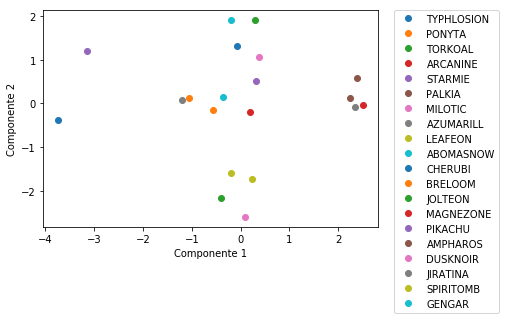

In [7]:
#3º) Representación gráfica de los individuos de nuestro dataset utilizando los valores de las componentes principales 
#obtenidas. Diagrama de dispersión en 2 dimensiones. 

#Calculamos el valor de los individuos para las dos componentes seleccionadas

individuos_componentes = np.zeros((len(columnas_estandarizadas), 2))

for i  in range(0, len(columnas_estandarizadas)):
    individuo = columnas_estandarizadas[i]
    #Calculamos para el individuo su valor para la componente 0
    individuos_componentes[i, 0] = (individuo*df_autov["autovectores"].loc[0]).sum()
    #Calculamos para el individuo su valor para la componente 1
    individuos_componentes[i, 1] = (individuo*df_autov["autovectores"].loc[1]).sum()
    
    #hacemos un plot de las componentes
    plt.plot(individuos_componentes[i, 0], individuos_componentes[i, 1], 'o', label=str(df_pokemon["Pokémon"].loc[i]))
plt.xlabel('Componente 1')
plt.ylabel('Componente 2')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()


## Interpretación de la información que proporciona el eje X y el eje Y
 
          Atributo       Componente 1  Componente 2
                 PS      0.454541      0.158473
             Ataque      0.450729     -0.251981
            Defensa      0.318823     -0.632008
    Ataque especial      0.423317      0.382280
    Defensa especial      0.480989     -0.168522
          Velocidad      0.279357      0.580880
          
 El objetivo de usar PCA es transformar un conjunto de variables originales en un nuevo conjunto de variables llamadas componentes principales, las cuales están incorreladas entre sí. 

 Para analizar la tabla de componentes obtenida, tenemos que mirar el valor absoluto de los coeficientes. En nuestro caso:  para la componente 1 afectan positivamente la defensa especial, los PS, el ataque y el ataque especial.
 
 Para la componente 2 afectan positivamente la velocidad y la defensa. 
 

## Interpretación del diagrama de dispersión

Si comparamos el diagrama de dispersión con la tabla de datos original, podemos comprobar que agrupa a los pokemon
según tengan  unas carácteristicas parecidas. Los pokémon que se agrupen en la derecha del diagrama serán aquellos
que tengan unas estadísticas de defensa especial, ps, ataque y ataque especial elevados, mientras que los que 
se agrupen en la zona superior del diagrama tendrán mucha velocidad y poca defensa.

Los que se encuentren en el centro del diagrama son aquellos pokémon con atributos más equilibrados.

Como detalle a destacar, los 4 que se agrupan en la derecha son los pokémon legendarios, que son los que tienen 
por lo general unos atributos de ataque, ataque especial y ps superior al resto de pokémon.

Por tanto hemos reducido la dimensionalidad de nuestro problema.


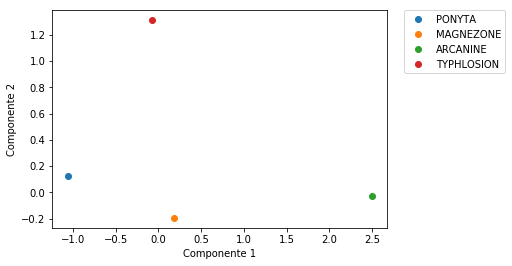


Datos de los pokemon
         Pokémon       Tipo  PS  Ataque  Defensa  Ataque especial  \
1.0       PONYTA      Fuego   2       3        2                2   
13.0   MAGNEZONE  Eléctrico   2       3        3                5   
3.0     ARCANINE      Fuego   3       5        3                4   
0.0   TYPHLOSION      Fuego   2       3        2                4   

      Defensa especial  Velocidad  
1.0                  2          3  
13.0                 2          2  
3.0                  3          4  
0.0                  2          4  


In [8]:
#Elegimos 4 individuos aleatorios para explicar lo que ocurre con ellos: 
individuos_muestreo = np.zeros((4, 3))
for i  in range(0, 4):
    #Seleccionamos un individuo aleatorio
    indice_aleatorio = np.random.randint(low = 0, high = len(columnas_estandarizadas))
    individuo_aleatorio = columnas_estandarizadas[indice_aleatorio, :]
    #Guardamos el indice del individuo en el dataset
    individuos_muestreo[i, 2] = indice_aleatorio
    #Calculamos para el individuo aleatorio su valor para la componente 0
    individuos_muestreo[i, 0] = (individuo_aleatorio*df_autov["autovectores"].loc[0]).sum()
    #Calculamos para el individuo aleatorio su valor para la componente 1
    individuos_muestreo[i, 1] = (individuo_aleatorio*df_autov["autovectores"].loc[1]).sum()
    
    #hacemos un plot de las componentes
    plt.plot(individuos_muestreo[i, 0], individuos_muestreo[i, 1], 'o', label=str(df_pokemon["Pokémon"].loc[indice_aleatorio]))
    
plt.xlabel('Componente 1')
plt.ylabel('Componente 2')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

print("\nDatos de los pokemon")
print(df_pokemon.loc[individuos_muestreo[:,2]])

## Analizamos los individuos aleatorios

En este caso los 4 pokémon que se han obtenido se encuentran muy dispersos en el diagrama, lo cual indica que tienen 
unos atributos muy distintos. 

En el caso de Arcaine, se encuentra en la zona derecha por sus altas estadísticas de ataque, ataque especial y vida.

Typhlosion destaca en la componente 1 sobre los demás debido a su alta velocidad y baja defensa.

Ponyta es el pokémon de los 4 seleccionados que menor ataque, ataque especial, vida tendría sobre los demás y por eso 
se encuentra en la zona izquierda del diagrama.

Magnezone sería el pokémon con estadísticas más equilibradas y por lo tanto se encuentra en el centro del diagrama.

## Método 2 (sklearn)

In [9]:
#4º) Tomamos de referencia este enlace: https://scikit-learn.org/stable/auto_examples/decomposition/plot_pca_iris.html
 
#No haría falta calcular la matriz de covarianza, ni los autovalores ni autovectores porque el método descomposition.PCA() de sklearn calcula los valores (paso 3 del anterior método) de los individuos para el número de componentes que elija.
pca = decomposition.PCA(n_components=2)
datos_pca = columnas_estandarizadas
pca.fit(datos_pca)

datos_pca = pca.transform(datos_pca)
#Este método cambia de signo el valor de las componentes, por lo que lo multiplicaremos por -1 para que coincidan los valores con el método anterior
datos_pca = datos_pca*(-1)
print("Valores de los individuos para las dos componentes seleccionadas")
print(datos_pca)

#Comprobamos los valores para las componentes de un individuo con los dos métodos que hemos realizado para ver si coinciden

#Comprobamos que todo lo realizado con el método anterior (matriz de varianza, obtención de autovalores y autovectores, porcentajes, etc) coincide con los valores obtenidos con sklearn
print("\nComprobacion:\n")
print(datos_pca[int(individuos_muestreo[0,2])])
print(individuos_muestreo[0,:2])

Valores de los individuos para las dos componentes seleccionadas
[[-0.07460611  1.31149507]
 [-1.06156513  0.12361938]
 [-0.40138774 -2.17319805]
 [ 2.4973882  -0.02984208]
 [ 0.32392296  0.52148558]
 [ 2.37519112  0.57566287]
 [ 0.37790141  1.05701597]
 [-1.21029374  0.07979217]
 [ 0.22509755 -1.73011396]
 [-0.35328174  0.13786839]
 [-3.73931858 -0.373642  ]
 [-0.57196059 -0.15009498]
 [ 0.28916959  1.89885207]
 [ 0.18704221 -0.19531287]
 [-3.1439549   1.19124218]
 [ 2.23467861  0.11443082]
 [ 0.09280114 -2.60875084]
 [ 2.34865959 -0.07366929]
 [-0.19868068 -1.59384045]
 [-0.19680319  1.91700002]]

Comprobacion:

[-1.06156513  0.12361938]
[-1.06156513  0.12361938]


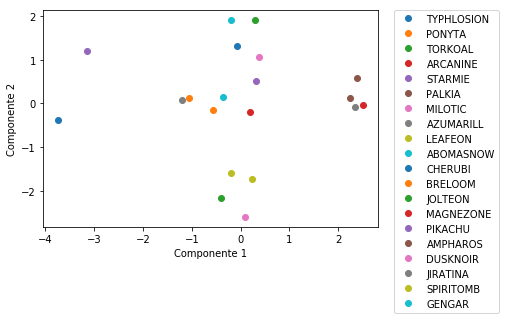

In [10]:
#Mostramos el diagrama de dispersión para las dos componentes de nuestros individuos

for i  in range(0, len(columnas_estandarizadas)):    
    #hacemos un plot de las componentes
    plt.plot(datos_pca[i, 0], datos_pca[i, 1], 'o', label=str(df_pokemon["Pokémon"].loc[i]))
plt.xlabel('Componente 1')
plt.ylabel('Componente 2')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

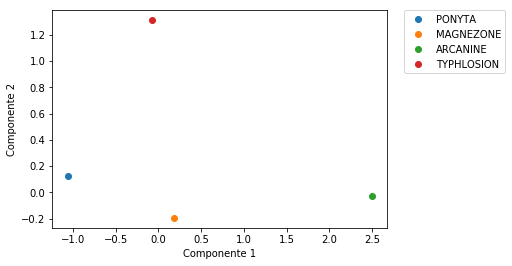


Datos de los pokemon
         Pokémon       Tipo  PS  Ataque  Defensa  Ataque especial  \
1.0       PONYTA      Fuego   2       3        2                2   
13.0   MAGNEZONE  Eléctrico   2       3        3                5   
3.0     ARCANINE      Fuego   3       5        3                4   
0.0   TYPHLOSION      Fuego   2       3        2                4   

      Defensa especial  Velocidad  
1.0                  2          3  
13.0                 2          2  
3.0                  3          4  
0.0                  2          4  


In [11]:
#Mostramos en la gráfica los individuos con las dos componentes. Utilizaremos los mismos que en método anterior
#En este caso solo mostraremos 4 individuos aleatorios.
for i in range(0, 4):
    #hacemos un plot de las componentes
    indice_aleatorio = int(individuos_muestreo[i, 2])
    plt.plot(datos_pca[indice_aleatorio, 0], datos_pca[indice_aleatorio, 1], 'o', label=str(df_pokemon["Pokémon"].loc[indice_aleatorio]))
    
plt.xlabel('Componente 1')
plt.ylabel('Componente 2')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

print("\nDatos de los pokemon")
print(df_pokemon.loc[individuos_muestreo[:,2]])

## Conclusiones ejercicio 4

La reprentación de los individuos coincide con el método realizado sin la librería sklearn, es decir, usando el método anterior. La librería sklearn nos permite calcular directamente los valores para el número de componentes que pasemos por 
parámetro, lo que nos ahorra tener que calcular la matriz de varianza, autovectores, autovalores, porcentajes y el cálculo
de los atributos para las componentes obtenidas, es decir, realiza todos los pasos de PCA.

